In [1]:
#importando bibliotecas
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras.layers import Input, Embedding, Flatten, Concatenate, Dense
from tensorflow.keras.models import Model
from tensorflow.keras.optimizers import Adam
from sklearn.preprocessing import MinMaxScaler
%matplotlib inline 

ModuleNotFoundError: No module named 'tensorflow'

In [6]:
pip install tensorflow

Note: you may need to restart the kernel to use updated packages.Collecting tensorflow
  Obtaining dependency information for tensorflow from https://files.pythonhosted.org/packages/93/21/9b035a4f823d6aee2917c75415be9a95861ff3d73a0a65e48edbf210cec1/tensorflow-2.15.0-cp311-cp311-win_amd64.whl.metadata
  Obtaining dependency information for tensorflow-intel==2.15.0 from https://files.pythonhosted.org/packages/4c/48/1a5a15517f18eaa4ff8d598b1c000300b20c1bb0e624539d702117a0c369/tensorflow_intel-2.15.0-cp311-cp311-win_amd64.whl.metadata
  Obtaining dependency information for absl-py>=1.0.0 from https://files.pythonhosted.org/packages/01/e4/dc0a1dcc4e74e08d7abedab278c795eef54a224363bb18f5692f416d834f/absl_py-2.0.0-py3-none-any.whl.metadata
  Obtaining dependency information for flatbuffers>=23.5.26 from https://files.pythonhosted.org/packages/6f/12/d5c79ee252793ffe845d58a913197bfa02ae9a0b5c9bc3dc4b58d477b9e7/flatbuffers-23.5.26-py2.py3-none-any.whl.metadata
     ------------------------------

ERROR: Exception:
Traceback (most recent call last):
  File "C:\Users\nicol\anaconda3\Lib\site-packages\pip\_vendor\urllib3\response.py", line 438, in _error_catcher
    yield
  File "C:\Users\nicol\anaconda3\Lib\site-packages\pip\_vendor\urllib3\response.py", line 561, in read
    data = self._fp_read(amt) if not fp_closed else b""
           ^^^^^^^^^^^^^^^^^^
  File "C:\Users\nicol\anaconda3\Lib\site-packages\pip\_vendor\urllib3\response.py", line 527, in _fp_read
    return self._fp.read(amt) if amt is not None else self._fp.read()
           ^^^^^^^^^^^^^^^^^^
  File "C:\Users\nicol\anaconda3\Lib\site-packages\pip\_vendor\cachecontrol\filewrapper.py", line 90, in read
    data = self.__fp.read(amt)
           ^^^^^^^^^^^^^^^^^^^
  File "C:\Users\nicol\anaconda3\Lib\http\client.py", line 466, in read
    s = self.fp.read(amt)
        ^^^^^^^^^^^^^^^^^
  File "C:\Users\nicol\anaconda3\Lib\socket.py", line 706, in readinto
    return self._sock.recv_into(b)
           ^^^^^^^^^^^^^^^

In [2]:
#leitura e visualização do arquivo csv
dataframe = pd.read_csv('spotify_songs.csv')

dataframe.head()

,track_id,track_name,track_artist,track_popularity,track_album_id,track_album_name,track_album_release_date,playlist_name,playlist_id,playlist_genre,...,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_ms
0,6f807x0ima9a1j3VPbc7VN,I Don't Care (with Justin Bieber) - Loud Luxur...,Ed Sheeran,66,2oCs0DGTsRO98Gh5ZSl2Cx,I Don't Care (with Justin Bieber) [Loud Luxury...,2019-06-14,Pop Remix,37i9dQZF1DXcZDD7cfEKhW,pop,...,6,-2.634,1,0.0583,0.1020,0.000000,0.0653,0.518,122.036,194754
1,0r7CVbZTWZgbTCYdfa2P31,Memories - Dillon Francis Remix,Maroon 5,67,63rPSO264uRjW1X5E6cWv6,Memories (Dillon Francis Remix),2019-12-13,Pop Remix,37i9dQZF1DXcZDD7cfEKhW,pop,...,11,-4.969,1,0.0373,0.0724,0.004210,0.3570,0.693,99.972,162600
2,1z1Hg7Vb0AhHDiEmnDE79l,All the Time - Don Diablo Remix,Zara Larsson,70,1HoSmj2eLcsrR0vE9gThr4,All the Time (Don Diablo Remix),2019-07-05,Pop Remix,37i9dQZF1DXcZDD7cfEKhW,pop,...,1,-3.432,0,0.0742,0.0794,0.000023,0.1100,0.613,124.008,176616
3,75FpbthrwQmzHlBJLuGdC7,Call You Mine - Keanu Silva Remix,The Chainsmokers,60,1nqYsOef1yKKuGOVchbsk6,Call You Mine - The Remixes,2019-07-19,Pop Remix,37i9dQZF1DXcZDD7cfEKhW,pop,...,7,-3.778,1,0.1020,0.0287,0.000009,0.2040,0.277,121.956,169093
4,1e8PAfcKUYoKkxPhrHqw4x,Someone You Loved - Future Humans Remix,Lewis Capaldi,69,7m7vv9wlQ4i0LFuJiE2zsQ,Someone You Loved (Future Humans Remix),2019-03-05,Pop Remix,37i9dQZF1DXcZDD7cfEKhW,pop,...,1,-4.672,1,0.0359,0.0803,0.000000,0.0833,0.725,123.976,189052


In [3]:
dataframe.columns

Index(['track_id', 'track_name', 'track_artist', 'track_popularity',
       'track_album_id', 'track_album_name', 'track_album_release_date',
       'playlist_name', 'playlist_id', 'playlist_genre', 'playlist_subgenre',
       'danceability', 'energy', 'key', 'loudness', 'mode', 'speechiness',
       'acousticness', 'instrumentalness', 'liveness', 'valence', 'tempo',
       'duration_ms'],
      dtype='object')

In [4]:
dataframe.isnull().sum()

track_id                    0
track_name                  5
track_artist                5
track_popularity            0
track_album_id              0
track_album_name            5
track_album_release_date    0
playlist_name               0
playlist_id                 0
playlist_genre              0
playlist_subgenre           0
danceability                0
energy                      0
key                         0
loudness                    0
mode                        0
speechiness                 0
acousticness                0
instrumentalness            0
liveness                    0
valence                     0
tempo                       0
duration_ms                 0
dtype: int64

In [5]:
dataframe['track_name'].fillna(0, inplace=True)
dataframe['track_artist'].fillna(0, inplace=True)
dataframe['track_album_name'].fillna(0, inplace=True)

In [6]:
dataframe.shape

(32833, 23)

In [7]:
dataframe.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32833 entries, 0 to 32832
Data columns (total 23 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   track_id                  32833 non-null  object 
 1   track_name                32833 non-null  object 
 2   track_artist              32833 non-null  object 
 3   track_popularity          32833 non-null  int64  
 4   track_album_id            32833 non-null  object 
 5   track_album_name          32833 non-null  object 
 6   track_album_release_date  32833 non-null  object 
 7   playlist_name             32833 non-null  object 
 8   playlist_id               32833 non-null  object 
 9   playlist_genre            32833 non-null  object 
 10  playlist_subgenre         32833 non-null  object 
 11  danceability              32833 non-null  float64
 12  energy                    32833 non-null  float64
 13  key                       32833 non-null  int64  
 14  loudne

In [8]:
dataframe.describe()

,track_popularity,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_ms
count,32833.000000,32833.000000,32833.000000,32833.000000,32833.000000,32833.000000,32833.000000,32833.000000,32833.000000,32833.000000,32833.000000,32833.000000,32833.000000
mean,42.477081,0.654850,0.698619,5.374471,-6.719499,0.565711,0.107068,0.175334,0.084747,0.190176,0.510561,120.881132,225799.811622
std,24.984074,0.145085,0.180910,3.611657,2.988436,0.495671,0.101314,0.219633,0.224230,0.154317,0.233146,26.903624,59834.006182
min,0.000000,0.000000,0.000175,0.000000,-46.448000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,4000.000000
25%,24.000000,0.563000,0.581000,2.000000,-8.171000,0.000000,0.041000,0.015100,0.000000,0.092700,0.331000,99.960000,187819.000000
50%,45.000000,0.672000,0.721000,6.000000,-6.166000,1.000000,0.062500,0.080400,0.000016,0.127000,0.512000,121.984000,216000.000000
75%,62.000000,0.761000,0.840000,9.000000,-4.645000,1.000000,0.132000,0.255000,0.004830,0.248000,0.693000,133.918000,253585.000000
max,100.000000,0.983000,1.000000,11.000000,1.275000,1.000000,0.918000,0.994000,0.994000,0.996000,0.991000,239.440000,517810.000000


In [9]:
pd.DataFrame({'count': dataframe.shape[0], 'nulls': dataframe.isnull().sum(), 'nulls%': dataframe.isnull().mean() * 100, 'cardinality': dataframe.nunique()})

,count,nulls,nulls%,cardinality
track_id,32833,0,0.0,28356
track_name,32833,0,0.0,23450
track_artist,32833,0,0.0,10693
track_popularity,32833,0,0.0,101
track_album_id,32833,0,0.0,22545
track_album_name,32833,0,0.0,19744
track_album_release_date,32833,0,0.0,4530
playlist_name,32833,0,0.0,449
playlist_id,32833,0,0.0,471
playlist_genre,32833,0,0.0,6


In [ ]:
pip install scikit-learn

In [10]:
recursos = ['danceability', 'energy', 'key', 'loudness', 'speechiness', 'acousticness', 'instrumentalness', 'liveness', 'valence', 'tempo']

#normalizar recursos
scaler = MinMaxScaler()
dataframe[recursos] = scaler.fit_transform(dataframe[recursos])

In [11]:
train, test = train_test_split (dataframe, test_size=0.2, random_state=42)

In [13]:
from sklearn.metrics.pairwise import cosine_similarity

track_features = dataframe[recursos]
track_similarity_matrix = cosine_similarity(track_features, track_features)

track_similarity_dataframe = pd.DataFrame(track_similarity_matrix, index=dataframe['track_id'], columns=dataframe['track_id'])

In [50]:
#funcao que busca as musicas similares do spotify
def find_top_similar_songs(song_id, top_n=5):
    chosen_song_index = dataframe[dataframe['track_id'] == song_id].index[0]
    similarity_scores = track_similarity_dataframe.iloc[chosen_song_index]
    similarity_songs = similarity_scores.sort_values(ascending=False)
    top_similar_songs = similarity_songs.iloc[1:top_n+1]
    top_similar_songs_ids = top_similar_songs.index.tolist()
    top_similar_songs_details = dataframe[dataframe['track_id'].isin(top_similar_songs_ids)]
    
    return top_similar_songs_details

chosen_track_id = '1e8PAfcKUYoKkxPhrHqw4x'
top_similar_songs = find_top_similar_songs(chosen_track_id, top_n=5)
print(top_similar_songs)

                     track_id  \
1834   6Z0F3Mqj7tq1CBZo5qMlUg   
13071  63diy8Bzm0pHMAU37By2Nh   
17934  6AKRht2NaMsg7z13psKjHk   
20439  6eDApnV9Jdb1nYahOlbbUh   
26033  5C25hyezPUXfOktnlSBAQ0   

                                              track_name    track_artist  \
1834   The Best of Both Worlds - From "Hannah Montana...  Hannah Montana   
13071                               Take Me Home Tonight     Eddie Money   
17934                                        Ruleta Rusa       Tony Dize   
20439                                           One Time   Justin Bieber   
26033                                       Fool For You     Alice Smith   

       track_popularity          track_album_id         track_album_name  \
1834                 58  0TyDqWrWHzuyFjjnKqDClu           Hannah Montana   
13071                55  590LYMDhJ9uUglR8QeNGWz  The Best Of Eddie Money   
17934                33  42lJZCvIlhHoRZKGfyua6w              Ruleta Rusa   
20439                68  1rG5TDs3jYh6OU7

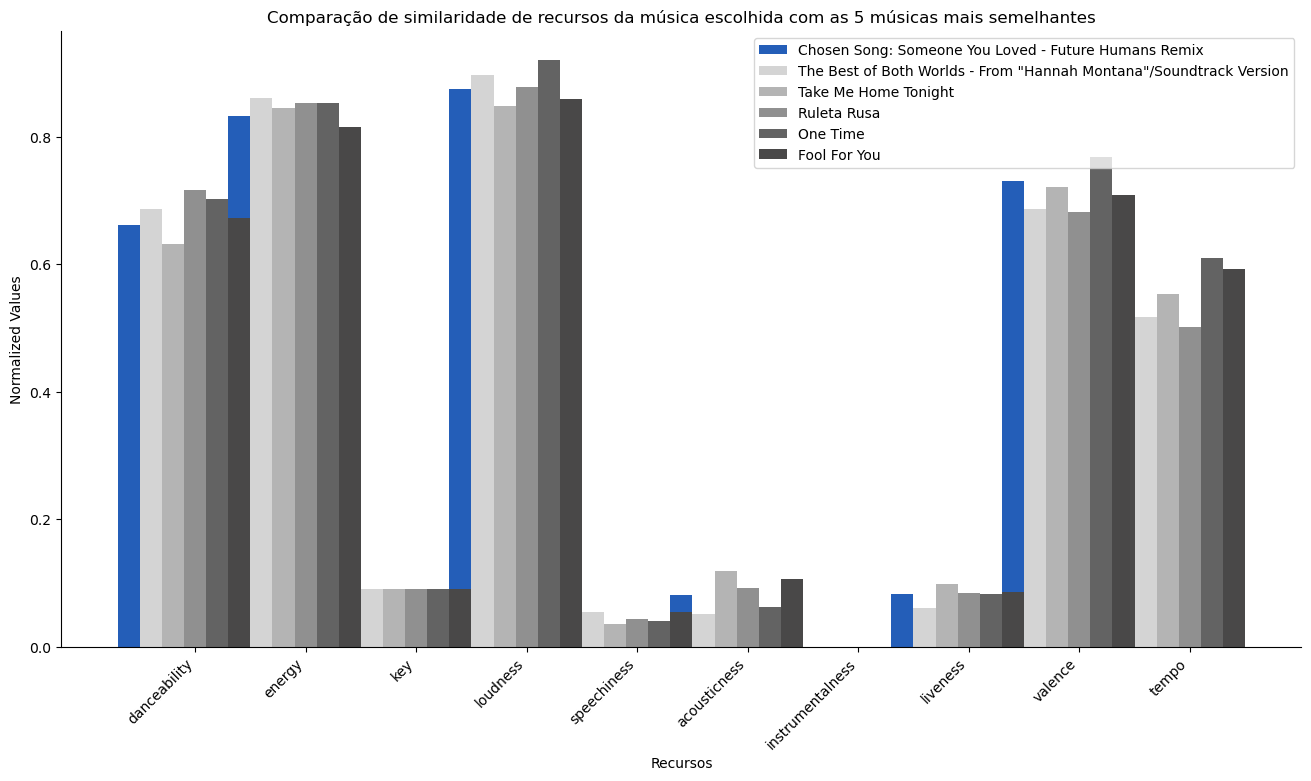

In [51]:
def plot_similarity_comparison(chosen_track_id, top_similar_songs):

    chosen_song = dataframe[dataframe['track_id'] == chosen_track_id]
    chosen_song_recursos = chosen_song[recursos].values.flatten()
    top_similar_songs_recursos = top_similar_songs[recursos].values

    plt.figure(figsize=(16, 8))
    bar_width = 0.2
    index = range(len(recursos))
    plt.bar(index, chosen_song_recursos, bar_width, label=f'Chosen Song: {chosen_song.iloc[0]["track_name"]}', color='#245eb8')
    
    colors = ['#D4D4D4', '#B4B4B4', '#909090', '#636363', '#494848']

    for i, similar_song_recursos in enumerate(top_similar_songs_recursos):
        plt.bar([x + (i + 1) * bar_width for x in index], similar_song_recursos, bar_width, label=top_similar_songs.iloc[i]['track_name'], color=colors[i])
    
    plt.gca().spines['top'].set_visible(False)
    plt.gca().spines['right'].set_visible(False)
    plt.xlabel('Recursos')
    plt.ylabel('Normalized Values')
    plt.title(f'Comparação de similaridade de recursos da música escolhida com as 5 músicas mais semelhantes')
    plt.xticks([x + (len(top_similar_songs) + 1) * bar_width / 2 for x in index], recursos, rotation=45, ha='right') 
    plt.legend(fontsize=10)
    plt.show()

plot_similarity_comparison(chosen_track_id, top_similar_songs)


In [54]:
#salvando dados
archive_name = 'spotify_similar_songs.csv'

# Salva o DataFrame em um arquivo CSV
dataframe.to_csv(archive_name, index=False)

print(f'Dados salvos com sucesso em {archive_name}')


Dados salvos com sucesso em spotify_similar_songs.csv


In [55]:
#salvar graficos
nome_do_grafico = 'spotify_similar_songs_graph.png'

# Salva o gráfico em um arquivo de imagem
plt.savefig(nome_do_grafico, bbox_inches='tight')

print(f'Gráfico salvo com sucesso em {nome_do_grafico}')


Gráfico salvo com sucesso em spotify_similar_songs_graph.png


<Figure size 640x480 with 0 Axes>

In [57]:
!git clone https://github.com/seu-nome-de-usuario/seu-repositorio.git


'apt-get' nÆo ‚ reconhecido como um comando interno
ou externo, um programa oper vel ou um arquivo em lotes.
